## Test mean flux emulator

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
from matplotlib import cm
# our modules
import likelihood
import mf_emulator
import p1d_arxiv
import data_PD2013

In [2]:
basedir='../../p1d_emulator/sim_suites/emulator_256_15072019/'
skewers_label='Ns256_wM0.05'
paramList=["mF","Delta2_p","sigT_Mpc","gamma","kF_Mpc"]
emu=mf_emulator.MeanFluxEmulator(basedir=basedir,skewers_label=skewers_label,paramList=paramList,train=True,verbose=True,emu_type='k_bin')

0 0.05 0.0 <mf< 0.15
1 0.15 0.05 <mf< 0.25
2 0.25 0.15 <mf< 0.35
3 0.35 0.25 <mf< 0.45
4 0.45 0.35 <mf< 0.55
5 0.55 0.45 <mf< 0.65
6 0.65 0.55 <mf< 0.75
7 0.75 0.65 <mf< 0.85
8 0.85 0.75 <mf< 0.95
9 0.95 0.85 <mf< 1.0
latin hyper-cube data {'param_space': {'Delta2_star': {'ip': 0, 'min_val': 0.25, 'max_val': 0.45, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$\\Delta^2_\\star$'}, 'n_star': {'ip': 1, 'min_val': -2.35, 'max_val': -2.25, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$n_\\star$'}, 'heat_amp': {'ip': 2, 'min_val': 0.3, 'max_val': 3.0, 'latex': '$H_A$'}, 'heat_slo': {'ip': 3, 'min_val': -1.5, 'max_val': 1.5, 'latex': '$H_S$'}, 'z_rei': {'ip': 4, 'min_val': 5.5, 'max_val': 16.0, 'latex': '$z_r$'}}, 'nsamples': 50, 'samples': {'0': [0.392, -2.319, 2.757, -0.4500000000000002, 11.905000000000001], '1': [0.268, -2.327, 1.0830000000000002, -1.41, 6.025], '2': [0.276, -2.311, 1.191, -0.09000000000000008, 5.605], '3': [0.376, -2.291, 0.813, -1.23, 9.805], '4': [0.3, -2.289, 2.703, -1.35, 15.68

 /Users/font/Programs/Others/anaconda3/lib/python3.6/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


6750 initial entries
353 final entries
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Cannot load emulators with non-standard training data
will train GP emulator
Training GP on 353 points
Optimised
6750 initial entries
859 final entries
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Cannot load emulators with non-standard training data
will train GP emulator
Training GP on 859 points
Optimised
6750 initial entries
1221 final entries
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Cannot load emulators with non-standard training data
will train GP emulator
Training GP on 1221 points
Optimised
6750 initial entries
1409 final entries
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Cannot load emulators with non-standard training data
will train GP emulator
Training GP on 1409 point

In [3]:
# setup toy data
data=data_PD2013.P1D_PD2013(blind_data=True,toy_data=True)

In [4]:
# setup likelihood
like=likelihood.Likelihood(emulator=emu,data=data)

Note: redshifts have been re-sorted (earliest first)


<IPython.core.display.Javascript object>


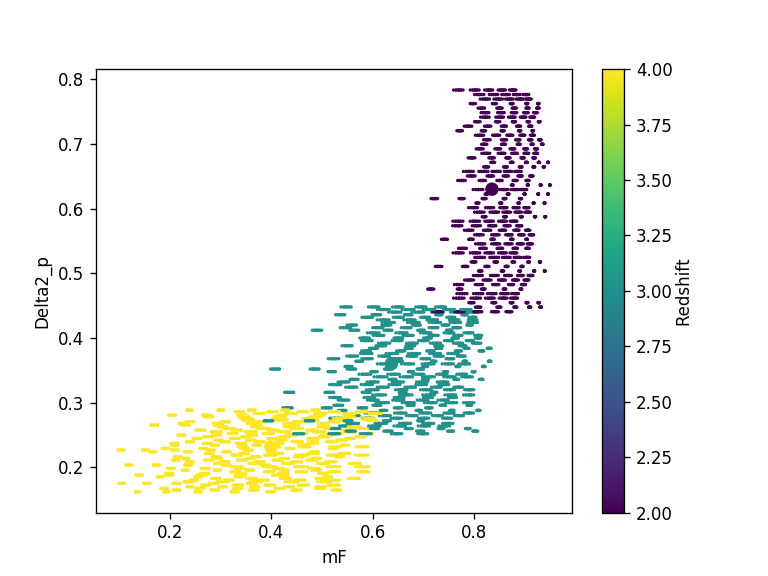

In [5]:
# compare the model we evaluate vs the entries in the archive
plt.figure()
like.overplot_emulator_calls(param_1='mF',param_2='Delta2_p')

<IPython.core.display.Javascript object>


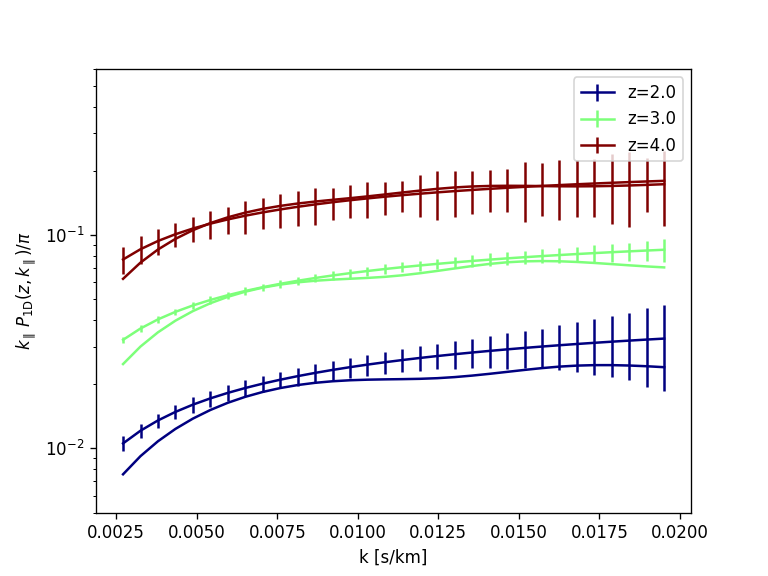

asked to emulate model {'Delta2_p': 0.63007281964778594, 'n_p': -2.2994793242105556, 'alpha_p': -0.21637595002359691, 'f_p': 0.95835691366843545, 'mF': 0.83445815041647264, 'gamma': 1.5249491108781212, 'sigT_Mpc': 0.1276290515968054, 'kF_Mpc': 10.214640596832252}
asked to emulate model {'Delta2_p': 0.36031650137680626, 'n_p': -2.2994794594828254, 'alpha_p': -0.21637600594737977, 'f_p': 0.98136955118501357, 'mF': 0.63649999999999995, 'gamma': 1.439685410940299, 'sigT_Mpc': 0.12349763773898846, 'kF_Mpc': 12.581594387770235}
asked to emulate model {'Delta2_p': 0.23205325295753354, 'n_p': -2.2994798610668852, 'alpha_p': -0.21637634322605101, 'f_p': 0.98982327607293863, 'mF': 0.39910638229074491, 'gamma': 1.3768467416640016, 'sigT_Mpc': 0.10804807112864845, 'kF_Mpc': 14.922495585491115}


In [6]:
plt.figure()
like.plot_p1d()

## Compare neighboring emulators

We will compair the prediction (and uncertainties) from neighboring emulators

In [7]:
# get measured bins from data
k_kms=data.k
zs=data.z
Nz=len(zs)

In [8]:
# setup linear power using list of likelihood parameters (will need this to get g_star and expansion)
linP_model=like.theory.cosmo.get_linP_model(like_params=[])
linP_model.get_params()
# figure out emulator calls, one per redshift
emu_calls=like.theory.get_emulator_calls()

0 2.0 <F>= 0.834458150416


<IPython.core.display.Javascript object>


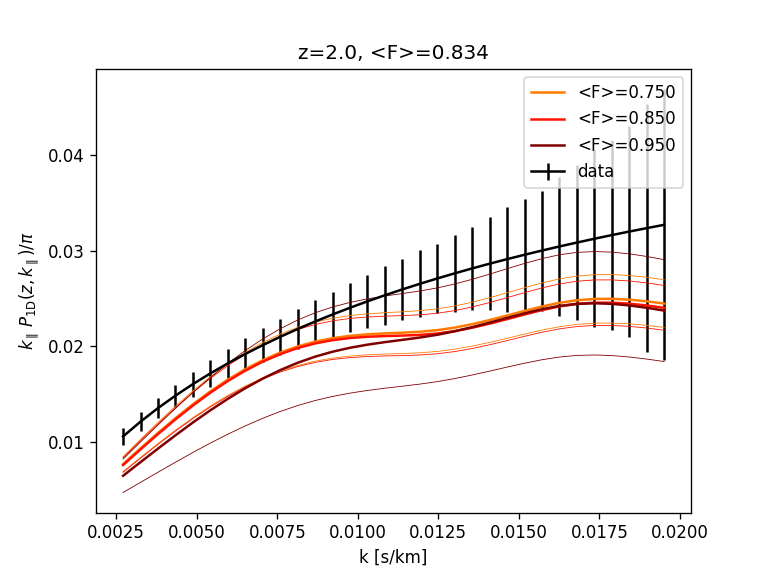

1 3.0 <F>= 0.6365


<IPython.core.display.Javascript object>


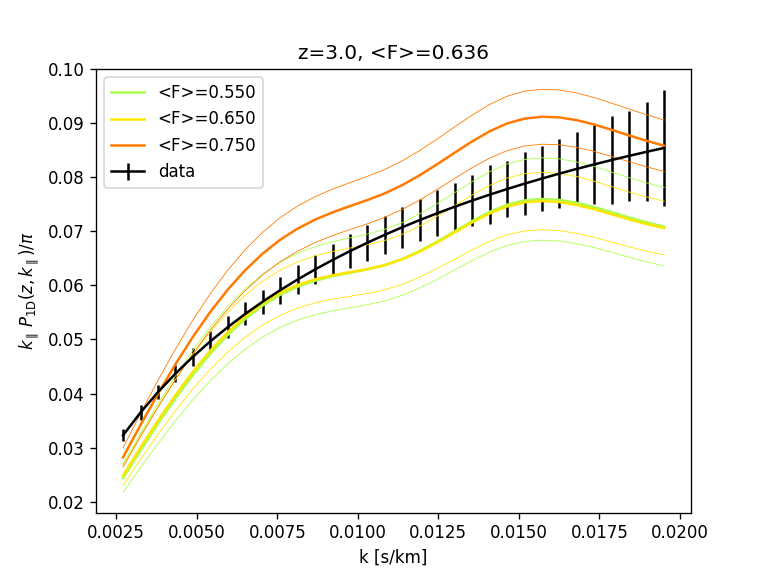

2 4.0 <F>= 0.399106382291


<IPython.core.display.Javascript object>


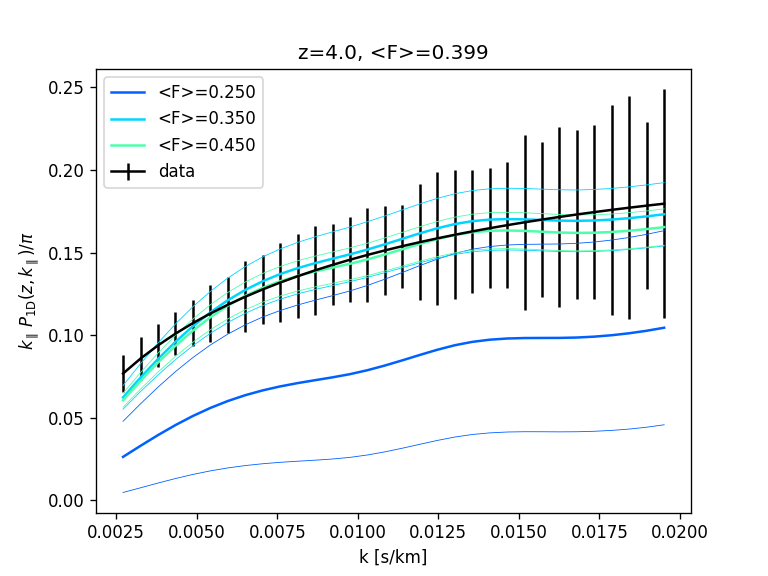

In [9]:
# loop over redshifts and compare P1D
for iz,z in enumerate(zs):
    # will call emulators for this model
    model=emu_calls[iz]
    mf=model['mF']
    print(iz,z,'<F>=',mf)
    # get data for this model
    p1d_data=data.get_Pk_iz(iz)
    p1d_cov=data.get_cov_iz(iz)
    # will use this to translate emulated P1D from Mpc to km/s
    dkms_dMpc=like.theory.cosmo.reconstruct_Hubble_iz(iz,linP_model)/(1+z)
    k_Mpc = k_kms * dkms_dMpc
    # start plot
    plt.figure()
    plt.errorbar(k_kms,p1d_data*k_kms/np.pi,color='black',
                yerr=np.sqrt(np.diag(p1d_cov))*k_kms/np.pi,label='data')
    plt.title('z=%.1f, <F>=%.3f'%(z,mf))
    # run over emulators in mean flux emulator
    for imf in range(emu.N_mf):
        cen_mf=emu.cen_mf[imf]
        if abs(cen_mf-mf)>0.15: continue
        p1d_Mpc_mf, cov_Mpc_mf = emu.emulators[imf].emulate_p1d_Mpc(model,k_Mpc,return_covar=True)
        p1d_kms_mf = p1d_Mpc_mf * dkms_dMpc
        cov_kms_mf = cov_Mpc_mf * dkms_dMpc**2
        err_kms_mf=np.sqrt(np.diag(cov_kms_mf))
        col = plt.cm.jet(imf/(emu.N_mf-1))
        plt.plot(k_kms,p1d_kms_mf*k_kms/np.pi,color=col,label='<F>=%.3f'%cen_mf)
        plt.plot(k_kms,(p1d_kms_mf+err_kms_mf)*k_kms/np.pi,color=col,lw=0.5)
        plt.plot(k_kms,(p1d_kms_mf-err_kms_mf)*k_kms/np.pi,color=col,lw=0.5)  
    plt.legend()
    plt.xlabel('k [s/km]')
    plt.ylabel(r'$k_\parallel \, P_{\rm 1D}(z,k_\parallel) / \pi$')